In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import urllib

In [33]:
data_books = pd.read_json("../data/all_books.json")
data_books_sp = data_books[data_books.bid < 10000]
data_books_sp = data_books_sp.drop_duplicates(subset=['bid'])


In [38]:

data_initials = pd.read_csv("../data/2dimreps_with_id_year_place_printer_proto.csv")

data_initials_per_book = data_initials.drop_duplicates(subset=['id'])
data_initials_per_book = data_initials_per_book[data_initials.id.astype(int) < 10000]
data_initials_per_book


,Unnamed: 0,0,1,id,year,place,printer,initial
0,0,13.827461,-50.803593,2280,1556,Seville,"Alvares, António","2280_cortes_breve_1556_p39,178,1182,179,175.jpg"
1,1,-4.930623,2.358046,1681,1538,Paris,"Chaudière, Regnault","1681_sacrobosco_sphaera_1538_p10,1516,2013,448..."
2,2,-77.934260,-17.628780,1842,1535,Salamanca,"Castañeda, Rodrigo de","1842_espinosa_philosophia_1535_p89,1447,1064,4..."
3,3,4.570943,-73.286130,1697,1548,Seville,"León, Juan de","1697_sacrobosco_tractado_1548_p125,388,682,380..."
4,4,-60.250870,-23.790068,2257,1551,Paris,"Vascosan, Michel","2257_fine_sphaera_1551_p27,214,957,376,381.jpg"
...,...,...,...,...,...,...,...,...
4947,4947,8.339881,32.265840,1692,1547,Leuven,"Nutius I., Martinus","1692_sacrobosco_sphaera_1547_p7,75,148,267,290..."
4987,4987,-13.942352,-18.304443,1737,1580,Venice,Company Heirs of Melchiorre Sessa I.,"1737_sacrobosco_sphaera_1580_p2,1488,526,357,3..."
5344,5344,-53.846737,-14.160137,1715,1561,Venice,"Rampazetto, Francesco","1715_sacrobosco_sphaera_1561_p3,2116,1018,508,..."
5363,5363,-63.411476,26.801191,2189,1626,Leiden,Company Bonaventura Elsevier & Abraham Elsevier,"2189_burgersdijck_sphaera_1626_p9,447,999,521,..."


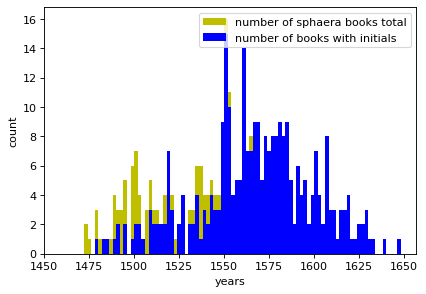

In [35]:
fig = plt.figure(figsize=(6, 4), dpi=80)

y = data_initials_per_book['year'].astype(int)
y2 = data_books_sp['year']

plt.hist(y2, bins = np.arange(min(y2), max(y2), 2), color = 'y', label= "number of sphaera books total")
plt.hist(y, bins = np.arange(min(y2), max(y2), 2), color = 'b', label = "number of books with initials")
plt.legend(loc=0)
plt.xlabel("years")
plt.ylabel("count")
#plt.title("INITALS")
plt.xticks(np.arange(1450, 1651, 25))
plt.show()

In [39]:
data_initials_per_printer = data_initials.drop_duplicates(subset=['printer'])
data_initials_per_printer = data_initials_per_printer[data_initials.id.astype(int) < 10000]
data_initials_per_printer

,Unnamed: 0,0,1,id,year,place,printer,initial
0,0,13.827461,-50.803593,2280,1556,Seville,"Alvares, António","2280_cortes_breve_1556_p39,178,1182,179,175.jpg"
1,1,-4.930623,2.358046,1681,1538,Paris,"Chaudière, Regnault","1681_sacrobosco_sphaera_1538_p10,1516,2013,448..."
2,2,-77.934260,-17.628780,1842,1535,Salamanca,"Castañeda, Rodrigo de","1842_espinosa_philosophia_1535_p89,1447,1064,4..."
3,3,4.570943,-73.286130,1697,1548,Seville,"León, Juan de","1697_sacrobosco_tractado_1548_p125,388,682,380..."
4,4,-60.250870,-23.790068,2257,1551,Paris,"Vascosan, Michel","2257_fine_sphaera_1551_p27,214,957,376,381.jpg"
...,...,...,...,...,...,...,...,...
3003,3003,26.483046,-29.809048,1858,1518,Strasbourg,"Knobloch I, Johann","1858_glogau_compendiosum_1518_p6,88,184,171,17..."
3100,3100,-69.517870,-5.562231,1950,1599,Madrid,"Herrera, Juan de","1950_rocamora_sphaera_1599_p113,140,1884,1198,..."
3121,3121,-12.453778,15.978523,2262,1580,Lemgo,"Grothe, Konrad","2262_scribonius_isagoge_1580_p4,8,681,353,359.jpg"
3597,3597,-79.332530,10.050096,2183,1616,Wittenberg,Company Heirs of Andreas Kelner,"2183_blebel_libellus_1616_p9,179,1965,785,785.jpg"


In [41]:
y = data_initials_per_printer['printer']

num_initials = [] 
for i in range(len(y.index)-1):
    num_initials.append(y.index[i+1]-y.index[i])
    
np.average(num_initials)


30.933333333333334

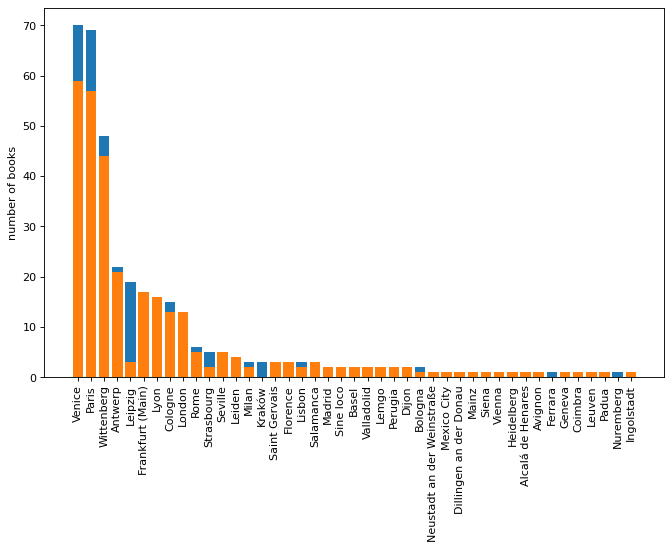

In [44]:
p = data_initials_per_book['place'].value_counts()
p2 = data_books_sp['place'].value_counts()
p_dict = p.to_dict()
p2_dict = p2.to_dict()
p_pd = pd.DataFrame.from_dict(p_dict, orient='index')
p2_pd = pd.DataFrame.from_dict(p2_dict, orient='index')

counter= p_dict

fig = plt.figure(figsize=(10, 6), dpi=80)
ax = fig.add_subplot(111)
frequencies = counter.values()
names = counter.keys()

names2 = p2_dict.keys()

frequencies2 = p2_dict.values()

plt.bar(names2, frequencies2)
plt.bar(names, frequencies)

ax.set_xticklabels(names2, rotation=90)
plt.ylabel("number of books")
#plt.title("Total number of sphaera books per city in relation to number of books with Initials")
plt.savefig('PrintersMarks_Colophons_perCity.png')
plt.show()

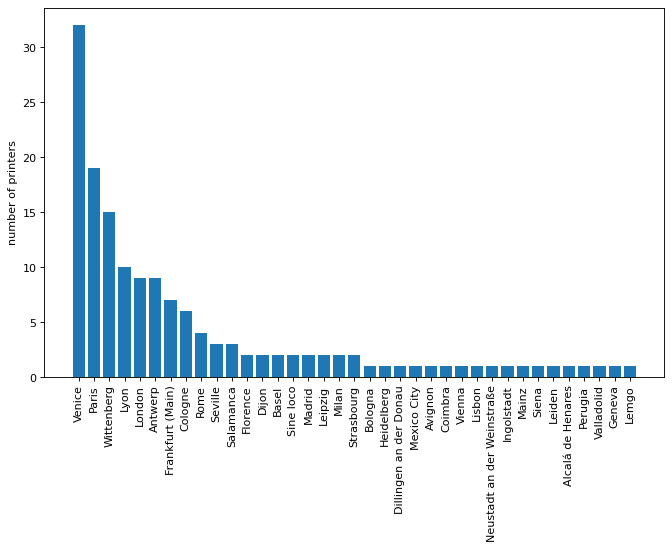

In [45]:
printers_initials_per_city = data_initials_per_printer['place'].value_counts()

printer_cities_dict = printers_initials_per_city.to_dict()


cities = printer_cities_dict.keys()

fig = plt.figure(figsize=(10, 6), dpi=80)
ax = fig.add_subplot(111)


plt.bar(cities, printers_initials_per_city)

ax.set_xticklabels(cities, rotation=90)
plt.ylabel("number of printers")
#plt.title("Number of printers with initials per city")
#plt.savefig('PrintersMarks_Colophons_perCity.png')
plt.show()